In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /home/eisti/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eisti/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eisti/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/eisti/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eisti/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [14]:
data = pd.read_csv("EuroMillions_numbers.csv", sep=";", index_col=0)

In [15]:
data.describe()

,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03
mean,20.924127,22.927162,25.732170,27.531866,29.759484,5.095599,6.790592,0.332322,4.979217e+07
std,14.879277,13.535269,12.887766,13.705442,15.035891,2.964476,3.213747,0.627419,4.056934e+07
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+07
25%,7.250000,12.000000,16.000000,17.000000,17.000000,3.000000,4.000000,0.000000,1.700000e+07
50%,18.000000,21.000000,26.000000,29.000000,32.000000,5.000000,7.000000,0.000000,3.513026e+07
75%,34.000000,33.000000,36.000000,39.000000,43.000000,8.000000,9.000000,1.000000,6.458316e+07
max,50.000000,50.000000,50.000000,50.000000,50.000000,12.000000,12.000000,5.000000,2.000000e+08


In [16]:
data.head()

,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
Date,,,,,,,,,
2004-12-24,3,27,29,4,37,6,5,1,10000000
2004-12-17,49,22,19,15,46,9,2,1,26215627
2004-11-26,24,1,34,4,36,8,6,1,43756502
2004-10-22,9,25,1,40,23,3,9,1,25059130
2004-01-10,48,20,45,21,12,6,5,1,29785269


In [17]:
data = data.sort_index(axis=0, ascending=True)
data.head()

,N1,N2,N3,N4,N5,E1,E2,Winner,Gain
Date,,,,,,,,,
2004-01-10,48,20,45,21,12,6,5,1,29785269
2004-02-13,32,16,29,41,36,9,7,1,15000000
2004-04-06,41,42,34,13,9,7,3,1,12488171
2004-05-03,39,37,4,7,33,5,1,1,20678070
2004-05-14,32,3,1,39,21,2,6,1,33816137


In [18]:
# Ajout de la variable cible au dataframe
size = len(data)
y = np.ones(size) # variable cible
data.insert(9, "Winning Serie", y)
data.head()

,N1,N2,N3,N4,N5,E1,E2,Winner,Gain,Winning Serie
Date,,,,,,,,,,
2004-01-10,48,20,45,21,12,6,5,1,29785269,1.0
2004-02-13,32,16,29,41,36,9,7,1,15000000,1.0
2004-04-06,41,42,34,13,9,7,3,1,12488171,1.0
2004-05-03,39,37,4,7,33,5,1,1,20678070,1.0
2004-05-14,32,3,1,39,21,2,6,1,33816137,1.0


In [19]:
# Génération d'une suite de numéros
boules = list(range(1, 51))
numbers = np.random.choice(boules, 5, replace=False)
stars = np.random.choice(boules[:12], 2, replace=False)

liste = np.zeros(7)
liste[:5] = numbers #sorted(numbers)
liste[5:7] = stars #sorted(stars)
print(numbers, stars, liste)

[36 48 49  8 14] [3 5] [36. 48. 49.  8. 14.  3.  5.]


In [32]:
data["Winner"].value_counts()

Index(['N1', 'N2', 'N3', 'N4', 'N5', 'E1', 'E2', 'Gain', 'Winning Serie'], dtype='object')

<AxesSubplot:>

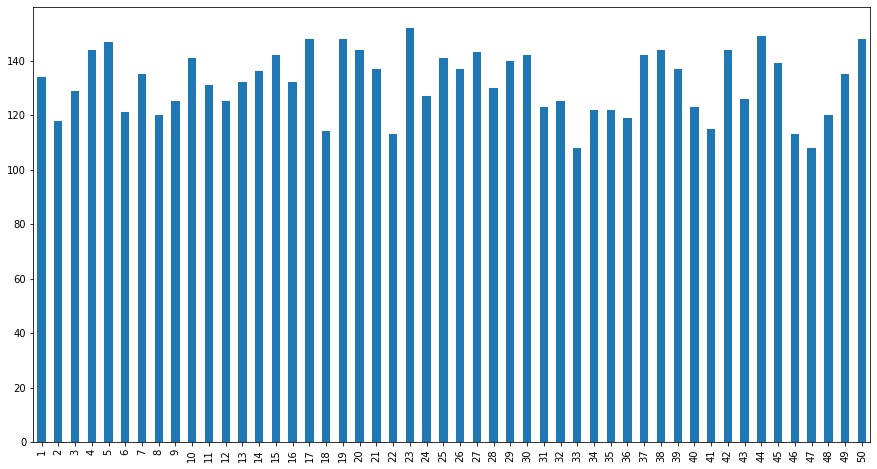

In [21]:
# Comptabilise les occurences des différents numéros
N1 = data["N1"].value_counts()
N2 = data["N2"].value_counts()
N3 = data["N3"].value_counts()
N4 = data["N4"].value_counts()
N5 = data["N5"].value_counts()
E1 = data["E1"].value_counts()
E2 = data["E2"].value_counts()

N_tot = N1+N2+N3+N4+N5
E_tot = E1+E2

plt.figure(figsize=(15,8))
N_tot.plot.bar()

<AxesSubplot:>

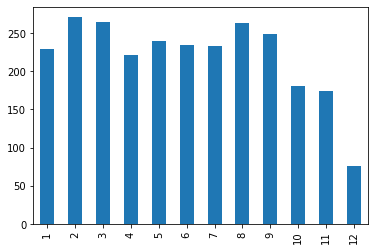

In [22]:
E_tot.plot.bar()

count     50.000000
mean     131.800000
std       11.875201
min      108.000000
25%      122.250000
50%      133.000000
75%      142.000000
max      152.000000
dtype: float64

Nombre le plus récurrent : 23 avec 152 occurences
Nombre le moins récurrent : 33 avec 108 occurences


<AxesSubplot:>

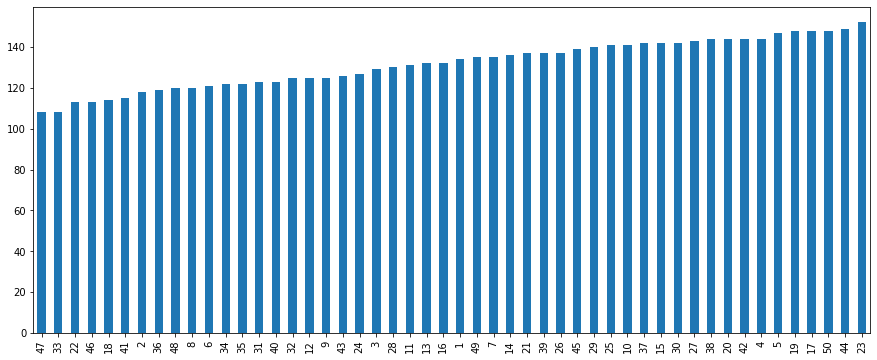

In [23]:
print(N_tot.describe())

print("\nNombre le plus récurrent : {} avec {} occurences".format(N_tot.idxmax(), N_tot.max()))
print("Nombre le moins récurrent : {} avec {} occurences".format(N_tot.idxmin(), N_tot.min()))

# trier les nombres par occurences
N_tot_sorted = N_tot.sort_values()
plt.figure(figsize=(15,6))
N_tot_sorted.plot.bar()

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
X = data[["N1", "N2", "N3", "N4", "N5", "E1","E2"]]
y = data[["Winning Serie"]]
# créer des tirages aléatoires
# les ajouter au df
data.head()

,N1,N2,N3,N4,N5,E1,E2,Winner,Gain,Winning Serie
Date,,,,,,,,,,
2004-01-10,48,20,45,21,12,6,5,1,29785269,1.0
2004-02-13,32,16,29,41,36,9,7,1,15000000,1.0
2004-04-06,41,42,34,13,9,7,3,1,12488171,1.0
2004-05-03,39,37,4,7,33,5,1,1,20678070,1.0
2004-05-14,32,3,1,39,21,2,6,1,33816137,1.0
